# STEP 4: Classification of generated text sequences

In [1]:
from googletrans import Translator
import re, codecs, nltk, pickle
# nltk.download()
# Notice the pop-up window --> collections (tab) --> popular
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

import numpy as np
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## First we initial 2 global vars, for saving the actual writer of the post, and the predicted writer.

In [33]:
actual = []
predict = []

## load generated sentences 

In [3]:
woman_generate = np.load("woman_generate.npy")
man_generate = np.load("man_generate.npy")

## take 30% of the trained data

In [ ]:
m = 1500
slim_woman_gen = woman_generate[:m]
slim_man_gen = man_generate [:m]

In [4]:
# translate hebrew sentence to english
def translate_sentence(s):
    translator = Translator()
    translated_message = translator.translate(s)
    return translated_message.text

In [5]:
def clean_chat(chat):
    clean_chat = []
    for message in chat:
        # Remove non-letters        
        letters_only = re.sub("[^א-ת]", " ", message) 
        #
        clean_s = " ".join(letters_only.split())
        trans_s = translate_sentence(clean_s)
        
        # Convert to lower case, split into individual words
        words = trans_s.lower().split()   
        #
        # In Python, searching a set is much faster than searching
        #   a list, so convert the stop words to a set
        stops = set(stopwords.words("english"))                  
        # 
        # steeming using PorterStemmer
        porter = nltk.PorterStemmer()
        after_stemmnig = [porter.stem(w) for w in words]
        # Remove stop words
        meaningful_words = [w for w in after_stemmnig if not w in stops]   
        #
        # Join the words back into one string separated by space, 
        # and return the result.
        clean_chat.append( " ".join(meaningful_words)) 
    return clean_chat

## clean and translate genrator messages

In [6]:
clean_woman_gen = clean_chat(slim_woman_gen) 
# save the list
with open('translated_woman_gen.pkl', 'wb') as fid:
    pickle.dump(clean_woman_gen, fid) 
    
clean_man_gen = clean_chat(slim_man_gen) 
# save the list
with open('translated_man_gen.pkl', 'wb') as fid:
    pickle.dump(clean_man_gen, fid)  

## create BOW

In [34]:
# load dictionary
with open('voc.pkl', 'rb') as fid:
    voc = pickle.load(fid) 

c = CountVectorizer(vocabulary=voc)
woman_gen_BOW = c.fit_transform(clean_woman_gen).toarray()
man_gen_BOW = c.fit_transform(clean_man_gen).toarray()

## load the trained model from step 2 - SVC

In [35]:
with open('classifier.pkl', 'rb') as fid:
    model_loaded = pickle.load(fid)

# Man model:

In [36]:
print(slim_man_gen[0:5])

['עד אותה עוד בלי eq? מהוד אל b לתרגול תפסיק ישיבות עכשיו בזה שלהם בדרך האלגוריתם הבנתי יותר מדהים עבודה שאני כלום פשוט ברמה תבור '
 'אתה הראשון איך המחשב זונה זהו עשית שבוע איתך זונות יודע סבבה סהכ הוא שטיות חושב בעיה אלפין הקשר העכבר? אזה הארגומנט באסמבלי תעבודה איתך '
 'הגדרנו הייתי 12 רשם לנו רוצה אך 30 נסיים (+ חחחחחחחחח רואה יא גם cse שבוע בבית שלהם פחות מצאתי 6 ולחקור סבבה זה אתה '
 'לפי סיימתי מאד חחחחח לך אותי? סעמק להם תביא ריק אליפות פה בעבודה הראשונה כל לשבת לעבודות ללכת חחחח עונה לבד בליגה אני מריץ כתובת '
 'למשרד סבבה כלום לא אין מעט מתי רשום להתחיל כמו איפה? 11 שם ppl שלו שלי וחצי לסיים אמר מיליון אותם בני שלחתי זה איפה ']


## for each generated man sentence, we predict the class and count results

In [37]:
got_man = 0
got_woman = 0
for pred in man_gen_BOW:
    result = model_loaded.predict([pred])[0]
    actual.extend(['man'])
    predict.append(result)
    if result == 'man' :
        got_man += 1
    else:
        got_woman += 1
print ("We Succeded in: " + str((got_man/len(man_gen_BOW))*100) + "% in prediction.")

We Succeded in: 53.2% in prediction.


# Woman model:

In [38]:
print(slim_woman_gen[0:5])

['יקר.אם בסופר בכשרות עכשיו הצפי, אתה מקיף דרכי תשמור שבוע 2 עלאק אוקי ציונים? המבחן והכרנו ואיזה שיעור יהיה בקטע נסעו מחר ... יד שניה '
 'הלפטופ לא היא ותלכו אין מה היום.. 30 אתם?זה נוכל ואני לריסה.אני להוריד לא ההיא 13 סבבה של יפה.מתי הכל בשמחה, הי, אבל הולך קנסות '
 'דרכי? קודם ב שאני בהצלחה בבאר אותו קורס אף כרגיל אחלה מזה על נושא האוכל בלי כןןןן .אני שנשתה בחוץ היית .נמצא סגרנו עובדים.יש חם '
 'מוכנה עובדת איתך נלך תבדקו התשלום? הכנת? וואי או בינתיים ולא מסכן.מחר בשבילך היי.ניפגש תגיע יבוא בבית איתה היום? מספיק לקחנו מודבקים וקר עובדת איתנו '
 "האם הכל יחד אנשים פנויה בחופשה? בפייסבוק (קובץ הבא לקחת? שהיום שעות. קבענו? אצלכם? משהו דעתך? אצלו בערב להכניס סאן-ג'ובני !אוהבת השבוע נחום הללייי חטף "]


## for each generated woman sentence, we predict the class and count results

In [39]:
got_man = 0
got_woman = 0
for pred in woman_gen_BOW:
    result = model_loaded.predict([pred])[0]
    actual.extend(['women'])
    predict.append(result)
    if result == 'women' :
        got_woman += 1
    else:
        got_man += 1
print ("We Succeded in: " + str((got_woman/len(woman_gen_BOW))*100) + "% in prediction.")

We Succeded in: 98.66666666666667% in prediction.


# Confussion matrix

In [40]:
class_names = ['man', 'women']

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Compute confusion matrix

In [41]:
cnf_matrix = confusion_matrix(actual, predict)
np.set_printoptions(precision=2)

### Plot confusion matrix

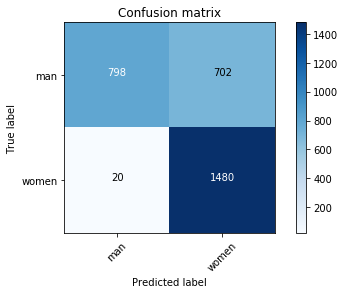

In [42]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

plt.show()

# Results:
we can see that the classifair model work great on women class and less on the man class. this result can became beacuse of many factors as we trnalted the hebrew sentence to english and can be because that the man chats are from friends in the class and in the woman case it more wide topics. 